<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib
from imutils import face_utils

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [10]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2023-05-01 17:18:00--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   206MB/s    in 0.3s    

2023-05-01 17:18:00 (206 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [78]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result = face.copy()
    im_gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")
    rects = detector(im_gray, 1)
    # loop over the face detections
    test = np.zeros_like(face)
    for (i, rect) in enumerate(rects):
      # determine the facial landmarks for the face region, then
      # convert the facial landmark (x, y)-coordinates to a NumPy
      # array
      shape = predictor(im_gray, rect)
      shape = face_utils.shape_to_np(shape)
      # convert dlib's rectangle to a OpenCV-style bounding box
      # [i.e., (x, y, w, h)], then draw the face bounding box
      (x, y, w, h) = face_utils.rect_to_bb(rect)
      cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
      # show the face number
      cv2.putText(result, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
      # loop over the (x, y)-coordinates for the facial landmarks
      # and draw them on the image
      # for (x, y) in shape:
      # cv2.circle(result, shape[1], 1, (0, 0, 255), 4)
      left, right, top, bottom = (shape[1][0]-130, shape[1][1]-100), (shape[54][0]+80, shape[54][1]), shape[28], (shape[57][0], shape[57][1]+80)
      src_pts = np.float32([(34,200), (1012, 351), (623,100), (614,691)])
      dst_pts = np.float32([left, right, top, bottom])
      M = cv2.getPerspectiveTransform(src_pts, dst_pts)
      warped = cv2.warpPerspective(mask, M, (face.shape[1], face.shape[0]))
      result = cv2.bitwise_or(face, warped)
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

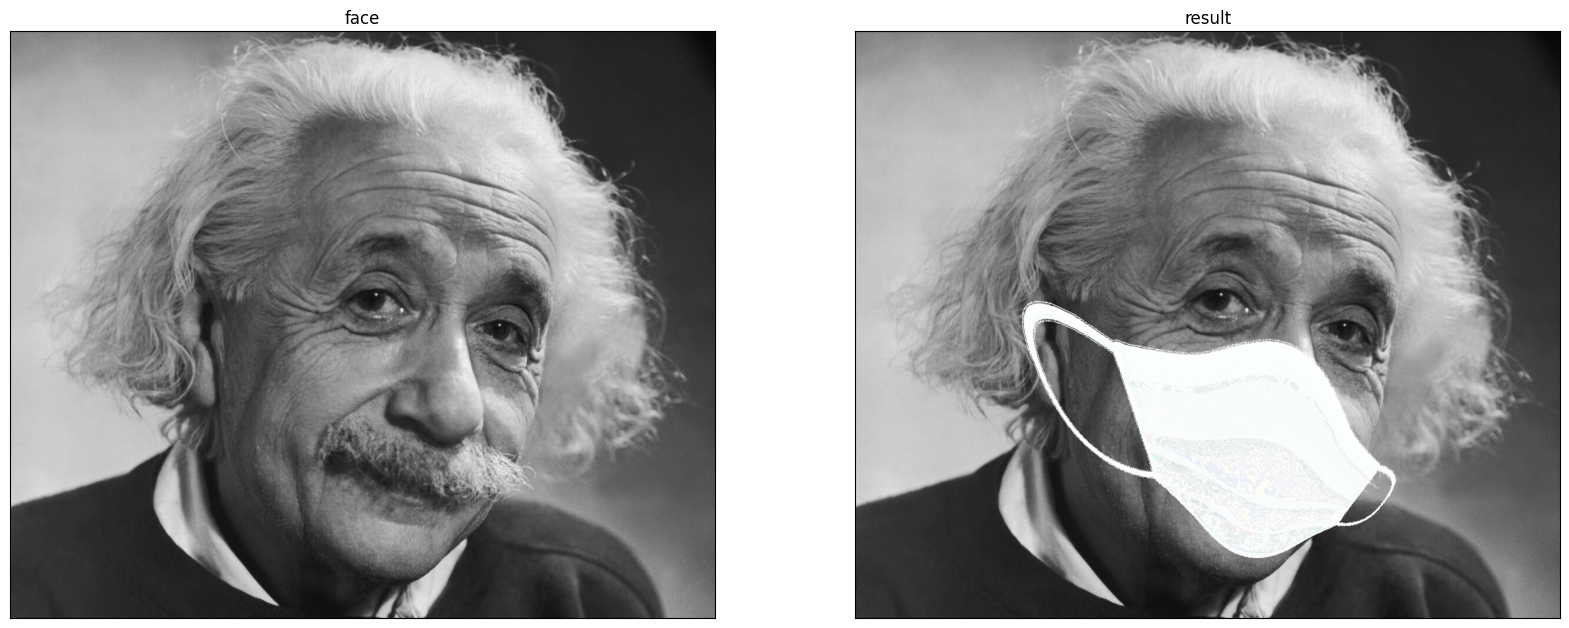

In [79]:
image_list = []
face = cv2.cvtColor(cv2.imread("drive/MyDrive/face.jpg"), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread("drive/MyDrive/mask.jpg"), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')